In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

$
Y = b_0 + b_1 X + E,\\
b_1 = \frac{\sigma_{XY}}{\sigma^2_X},\\
b_0 = \overline{Y} - b_1 \cdot {\overline{X}}
$

In [3]:
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

X = np.array(X)
y = np.array(y)

$
b = (X^\top X)^{-1} X^\top Y\\
Z = X \cdot b\\
\varepsilon = y - Z\\
R^2 = 1 - \dfrac{D(\varepsilon)}{D(y)}
$

$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$

In [4]:
def R2(x:np.ndarray, y:np.ndarray):
    
    ones = np.ones((x.shape[0],1))
    x = np.hstack([ones, x])
    
    XTX = x.T.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    
    b = XTX_inv.dot(x.T).dot(y)
    
    z = x.dot(b)
    e = y - z
    
    return 1 - e.var() / y.var()

In [5]:
R2(x=X,y=y)

1.0

In [6]:
for i, j in combinations(range(X.shape[1]), 2):
    r = R2(X[:, [i,j]], y)
    print(i, j, r)

0 1 0.18113594742585204
0 2 0.7634246238793152
0 3 0.45329667831440745
1 2 0.5479482734039011
1 3 0.6062055761129932
2 3 0.6224419876505322


Ответ: Линейная рекрессия имеет наилучший результат в 1м и 3м признаках.

$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)}$

In [7]:
k1 = 2
k2 = X.shape[0]- 2 - 1

R2 = R2(X[:, [0,2]], y)

F = (R2 / k1) / ((1 - R2) / k2)
F

11.29443912292265

In [8]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

$\Omega_\alpha = (4.74, \infty)$

In [9]:
F>=t

True

Ответ: Статистика попала в критическую область, уравнение регрессии признаётся значимым.

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?

$
Y_k = 2\\
\overline{Y}_1 = \frac{77}{2509}\\
n_1 = 2509\\
\overline{Y}_2 = \frac{60}{1465}\\
n_2 = 1465\\
H_0: \overline{Y}_1 = \overline{Y}_2\\
H_1: \overline{Y}_1 \neq \overline{Y}_2
$

In [10]:
y1 = np.zeros(2509)
y1[np.arange(77)] = 1

y2 = np.zeros(1465)
y2[np.arange(60)] = 1

y = np.concatenate([y1, y2])

In [11]:
n1 = y1.shape[0]
n2 = y2.shape[0]
n = n1+n2

n1, n2

(2509, 1465)

In [12]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y_mean = y.mean()

y1_mean, y2_mean, y_mean

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

$
SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i\\
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2
$

In [13]:
SSb = n1*(y1_mean - y_mean)**2 + n2*(y2_mean - y_mean)**2
SSw = ((y1 - y1_mean)**2).sum() + ((y2 - y2_mean)**2).sum()

SSb, SSw

(0.09748158004016791, 132.17956925035745)

$
\sigma_b^2 = \dfrac{SS_b}{k - 1}\\ 
\sigma_w^2 = \dfrac{SS_w}{n - k}
$

In [14]:
k = 2
k1 = k-1
k2 = n-k

sigma2b = SSb/k1
sigma2w = SSw/k2

sigma2b, sigma2w

(0.09748158004016791, 0.03327783717279895)

$F = \dfrac{\sigma_b^2}{\sigma_w^2}$

In [15]:
F = sigma2b/sigma2w
F

2.9293243889013496

In [16]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

$\Omega_\alpha = \left( 3.84, \infty \right)$

In [17]:
F>=t

False

Значение статистики попало в критическую область, поэтому заключаем, отличие конверсии на страницах A и B является значимым.

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [18]:
ds = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

In [19]:
ds = pd.DataFrame(ds)
ds

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


1. выборочное среднее и дисперсию каждой выборки

In [20]:
ds.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

In [21]:
ds.var()

x1    11.000000
y1     4.127269
x2    11.000000
y2     4.127629
x3    11.000000
y3     4.122620
x4    11.000000
y4     4.123249
dtype: float64

2. коэффициент корреляции Пирсона и прямую линейной регрессии

In [22]:
ds.corr()

,x1,y1,x2,y2,x3,y3,x4,y4
x1,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y1,0.816421,1.000000,0.816421,0.750005,0.816421,0.468717,-0.529093,-0.489116
x2,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y2,0.816237,0.750005,0.816237,1.000000,0.816237,0.587919,-0.718437,-0.478095
x3,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y3,0.816287,0.468717,0.816287,0.587919,0.816287,1.000000,-0.344661,-0.155472
x4,-0.500000,-0.529093,-0.500000,-0.718437,-0.500000,-0.344661,1.000000,0.816521
y4,-0.314047,-0.489116,-0.314047,-0.478095,-0.314047,-0.155472,0.816521,1.000000


In [23]:
def lin_reg(x, y):
    
    b1 = np.cov(x, y)[0, 1] / x.var()
    b0 = y.mean() - b1 * x.mean()
    
    return b0+b1*x

In [24]:
y1 = lin_reg(ds['x1'], ds['y1'])
y1

0      8.001000
1      7.000818
2      9.501273
3      7.500909
4      8.501091
5     10.001364
6      6.000636
7      5.000455
8      9.001182
9      6.500727
10     5.500545
Name: x1, dtype: float64

In [25]:
y2 = lin_reg(ds['x2'], ds['y2'])
y2

0      8.000909
1      7.000909
2      9.500909
3      7.500909
4      8.500909
5     10.000909
6      6.000909
7      5.000909
8      9.000909
9      6.500909
10     5.500909
Name: x2, dtype: float64

In [26]:
y3 = lin_reg(ds['x3'], ds['y3'])
y3

0     7.999727
1     7.000273
2     9.498909
3     7.500000
4     8.499455
5     9.998636
6     6.000818
7     5.001364
8     8.999182
9     6.500545
10    5.501091
Name: x3, dtype: float64

In [27]:
y4 = lin_reg(ds['x4'], ds['y4'])
y4

0      7.001
1      7.001
2      7.001
3      7.001
4      7.001
5      7.001
6      7.001
7     12.500
8      7.001
9      7.001
10     7.001
Name: x4, dtype: float64

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок

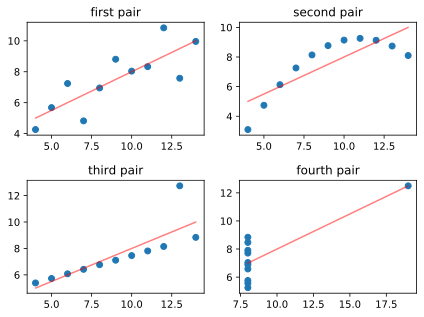

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax1, ax2, ax3, ax4 = ax.flatten()

ax1.scatter(ds['x1'], ds['y1'])
ax1.plot(ds['x1'], y1, c='red', alpha=0.5)
ax1.set_title('first pair')

ax2.scatter(ds['x2'], ds['y2'])
ax2.plot(ds['x2'], y2, c='red', alpha=0.5)
ax2.set_title('second pair')

ax3.scatter(ds['x3'], ds['y3'])
ax3.plot(ds['x3'], y3, c='red', alpha=0.5)
ax3.set_title('third pair')

ax4.scatter(ds['x4'], ds['y4'])
ax4.plot(ds['x4'], y4, c='red', alpha=0.5)
ax4.set_title('fourth pair')

fig.set_size_inches(7, 5)
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()